 # Lab 6
 
 ## William Willmon
 
 ### Newman Exercise 5.12 - Stefan-Boltzmann constant 

In [9]:
from IPython.core.display import HTML
def css_styling():
    styles = open("style.css", "r").read()
    return HTML(styles)
css_styling()

In [10]:
from scipy import integrate
import numpy as np
import math

k_b = 1.38e-23     # m^2kg/s^2K
c = 3e8            # m/s
hbar = 1.0546e-34  # m^2kg/s
T = 300            # K

def f(x):
    '''calculates a value at a given x for a certain function
    
    INPUTS:
    x - value to be evaluated
    
    RETURNS:
    f - a value for x of x**3*math.exp(-x)/(1-math.exp(-x))
    '''
    return x**3*math.exp(-x)/(1-math.exp(-x))

a = 0
b = np.inf

I, error = integrate.quad(f ,a ,b)
W = k_b**4*T**4/(4*math.pi**2*c**2*hbar**3)*I

print(W)
print(error)

457.7665441072754
2.6284714908361187e-09


<div class=answer>
The method used to calculate the integral was the Gaussian Quadrature. This method had an error of 2.62e-8 which is very accurate. The Gaussian Quadrature is a good fit to this curve because there is no noise to this function allowing a smooth fit and integral.
<div/>

In [11]:
sigma = W/T**4
sigma

5.651438816139203e-08

<div class=answer>
The actual value is 5.67e-8. This means our value is accurate to 2 significant figures, with an error of 0.02e-8. 
<div/>

### Newman Exercise 5.19 - Diffraction Gratings

The spacing between the splits, for a transmission function of $q(u) = sin^2\alpha u$ , in terms of $\alpha$ is $\pi/\alpha$.

The integral to be evaluated is given by,
$$
I(x) = |\int\sqrt{q(u)} e^{i2\pi xu/\lambda f}du |^2
$$

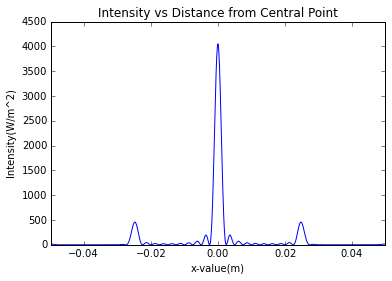

In [16]:
import cmath
import integrate
from matplotlib.pylab import plt
% matplotlib inline

w = 2e-4

def q(u):
    '''calculates a intesity transmissiom value at a given u
    
    INPUTS:
    u - distance from the central axis to be evaluated
    
    RETURNS:
    q(u) - the intensity transmission at the distance u given by
           math.sin(alpha*u)**2
    '''
    d = 2e-5
    alpha = math.pi/d
    return math.sin(alpha*u)**2

def integrand(func,u,x):
    '''the integrand to be evaluated for the intensity of light deen on the screen
    
    INPUTS:
    func - intensity =transmission function 
    u - distance from the central axis to be evaluated
    x - point on the screen to be evaluated
    
    RETURNS:
    integrand - the integrand to be evaluated
    '''
    f = 1
    lam = 5e-7
    o = func(u)
    return math.sqrt(o)*cmath.exp(1j*2*math.pi*x*u/(lam*f))

x_value = np.linspace(-0.05,0.05,1000)
I_value = []
for i in x_value:
    N = 100
    a = -w/2
    b = w/2
    h = ((b-a)/N)

    s =(integrand(q,a,i)/3) + (integrand(q,b,i)/3)
    for k in range(1,100):
        if(k % 2 == 1):
            s += 4/3*integrand(q,a+(k)*h,i)
        else:
            s += 2/3*integrand(q,a+(k)*h,i)
    I_value.append(abs(s)**2)
    
plt.plot(x_value,I_value)
plt.xlim(-0.05,0.05)
plt.xlabel("x-value(m)")
plt.ylabel("Intensity(W/m^2)")
plt.title("Intensity vs Distance from Central Point")

<div class=answer>
The graph above shows the intensity of the light hitting the screen at a distance, x, away from the center of the screen. The intensity plot is created by evaluating an integral that contains a transmission function $q(u) = sin^2(\alpha u)$ which describes the diffraction grating. When light hits a diffraction grating causing the light to go through slits and bend. The light then hits a lens that bends toward a points on the screen. All of the light hitting the diffraction grating has the same wavelength but the grating causes a phase shift to occur. This phase shit causes the light to either interfere constructively or destructively. The constructive interfernce is what creates the high points on the intensity plot but the destructive interference causes the troughs in the graph above. 
<div/> 

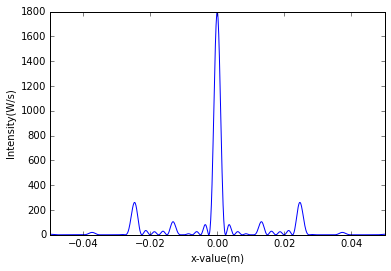

In [13]:
def q_new(u):
    '''calculates a intesity emissiom value at a given u
    
    INPUTS:
    u - distance from the central axis to be evaluated
    
    RETURNS:
    q_new(u) - the intensity emission at the distance u given by
           math.sin(alpha*u)**2*math.sin(beta*u)**2
    '''
    d = 2e-5
    alpha = math.pi/(d)
    beta = alpha/2
    return math.sin(alpha*u)**2*math.sin(beta*u)**2

x2_value = np.linspace(-0.05,0.05,1000)
I2_value = []

for i in x2_value:
    N = 100
    a = -w/2
    b = w/2
    h = ((b-a)/N)

    s2 =(integrand(q_new,a,i)/3) + (integrand(q_new,b,i)/3)
    for k in range(1,100):
        if(k % 2 == 1):
            s2 += 4/3*integrand(q_new,a+(k)*h,i)
        else:
            s2 += 2/3*integrand(q_new,a+(k)*h,i)
    I2_value.append(abs(s2)**2)
    
plt.plot(x2_value,I2_value)
plt.xlim(-0.05,0.05)
plt.xlabel("x-value(m)")
plt.ylabel("Intensity(W/s)")


<div class=answer>
The graph above is the same intensity plot as above. The plot now is just made with a different diffraction grating with a transmition function $q(u) = sin^2(\alpha u)*sin^2(\beta u)$ where $\beta = \alpha /2 $ . The change in the diffraction grating causes there to be more superpositions which is constructive interference. Yet it causes the magnitudes of the superpositions to be less than the previous graph.
<div/>